In [1]:
%config IPCompleter.greedy=True       

# Departamento de recursos humanos
## -Los propietarios de pymes dedican el 40% de jornada laboral a tareas de contratación y gastan entre 15% y 20% del salario del empleado para contratar uno nuevo - La empresa pierde entre el 1% y 2.5% de sus ingresos totales en el tiempo que lleva orientar al nuevo empleado - En promedio, se necesita 52 dias para cubrir un puesto
## Objetivo: Recopilar los datos de la empresa sobre sus empleados y desarrollar un modelo predictivo sobre los empleados con probabilidad a renunciar.


<img src=https://ticnegocios.camaravalencia.com/wp-content/uploads/2022/10/Machine-Learning-para-empresas.jpg>


In [2]:
import pandas as pd
from scipy import stats
import numpy as np
from numpy.random import randn
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("Human_Resources.csv")

In [4]:
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
data.tail(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


- El conjunto de datos es formada por la ubicación del empleado, educación, area de trabajo, edad, participación-satisfacción laboral, horas de trabajo, balance de vida con trabajo , experiencia en el area y perdida de empleado. 


- Las variables 'Attritition', 'Over18 y 'Overtime' categoricas Yes y NO seran corregidas a numeros enteros 1 y 0 por  antes de poder llevar a cabo cualquier visualización



In [6]:
data['Attrition'] = data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
data['OverTime'] = data['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
data['Over18'] = data['Over18'].apply(lambda x: 1 if x == 'Y' else 0)    

In [7]:
data.head(4)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0


In [8]:
data.tail(4)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,0,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


##### Verificar si existen Datos Faltantes

<AxesSubplot:>

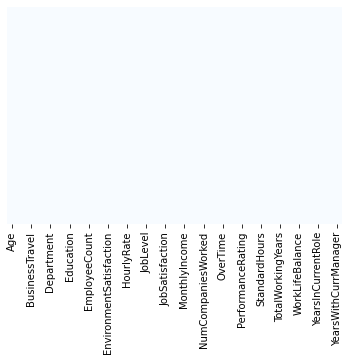

In [9]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap = "Blues")


- Luego del pre-procesamiento de los datos es elegible visualizar el comportamiento de los datos la distribución entre ellas

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Attrition'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'EmployeeCount'}>,
        <AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>],
       [<AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>],
       [<AxesSubplot:title={'center':'Over18'}>,
        <AxesSubplot:title={'center':'OverTime'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
       

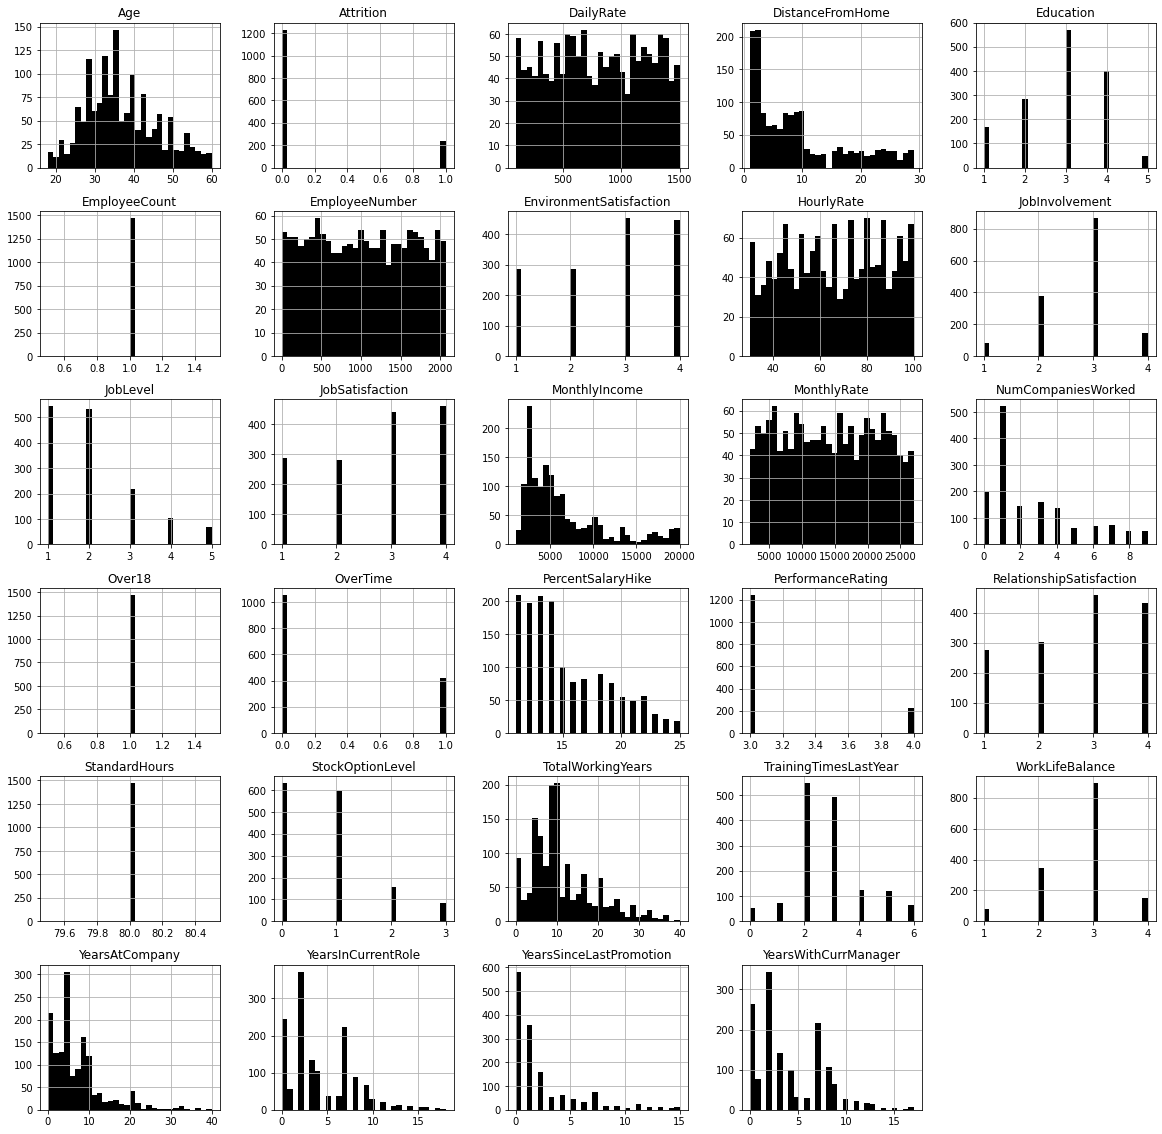

In [10]:
data.hist(bins=30, figsize=(20,20), color = 'black')


- DistanceFromHome, monthyincome, totalworking tienen una cola larga distribucion exponencial y  'Employeecount' y ' standarshours' no tienen un cambio significativo 
- Tiene sentido eliminar de 'EmployeeCount', 'EmployeeNumber' , 'Standardhours' y 'Over18' ya que son campos que no cambian de un empleado a otro.

In [11]:
data.drop(["EmployeeCount", "StandardHours", "Over18", "EmployeeNumber"], axis = 1, inplace = True)

- Veamos cuantos empleados dejan la empresa!

In [12]:

left   = data[data['Attrition'] == 1] # Contamos el número de empleados que se fueron
stayed = data[data['Attrition'] == 0] # y que se quedaron  


print("Total = ", len(data))

print("Número de empleados que dejan la empresa = ", len(left))
print("Porcentaje de empleados que dejan la empresa = ", 1.*len(left)/len(data)*100.0, "%")

print("Número de empleados que permanecen en la empresa = ", len(stayed))
print("Porcentaje de empleados que se quedan en la empresa = ", 1.*len(stayed)/len(data)*100.0, "%")

Total =  1470
Número de empleados que dejan la empresa =  237
Porcentaje de empleados que dejan la empresa =  16.122448979591837 %
Número de empleados que permanecen en la empresa =  1233
Porcentaje de empleados que se quedan en la empresa =  83.87755102040816 %


- Parece que estamos ante un conjunto de datos desequilibrado


In [13]:
left.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


- Breve resumen del data left. El promedio en edad es 33.6 años, la distancia de casa al trabajo 10.6 km, educación aproximado 3 (Educación superior) y asi sucesivamente

In [14]:
stayed.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


- Breve resumen del data stayed. El promedio en edad es 37.5 años, la distancia de casa al trabajo 8.9 km, educación aproximado 3 (Educación superior) y asi sucesivamente

- Veremos que variables se correlacionan entre si 

<AxesSubplot:>

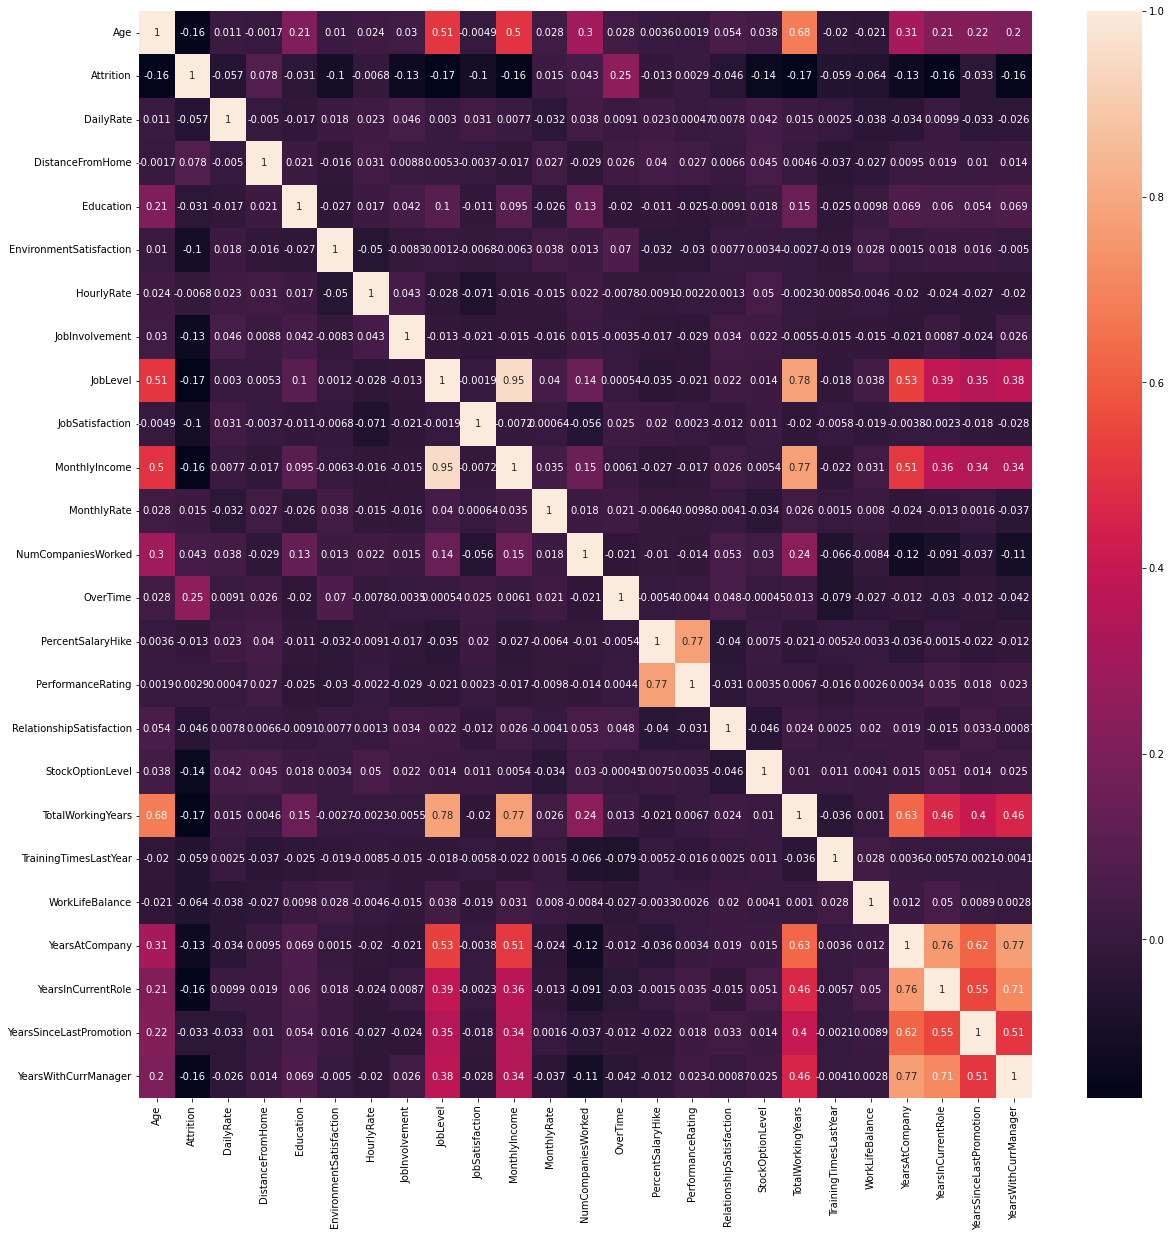

In [15]:
correlations = data.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot=True)


#### 1.- Job level está altamente correlacionado con el número total de horas de trabajo.
#### 2.- Monthly income está altamente correlacionado con Job level. 
#### 3.- Monthly income está altamente correlacionado con el número total de horas de trabajo. 
#### 4.- Age está altamente correlacionado con los ingresos mensuales


### Visualizaremos variables de interes 

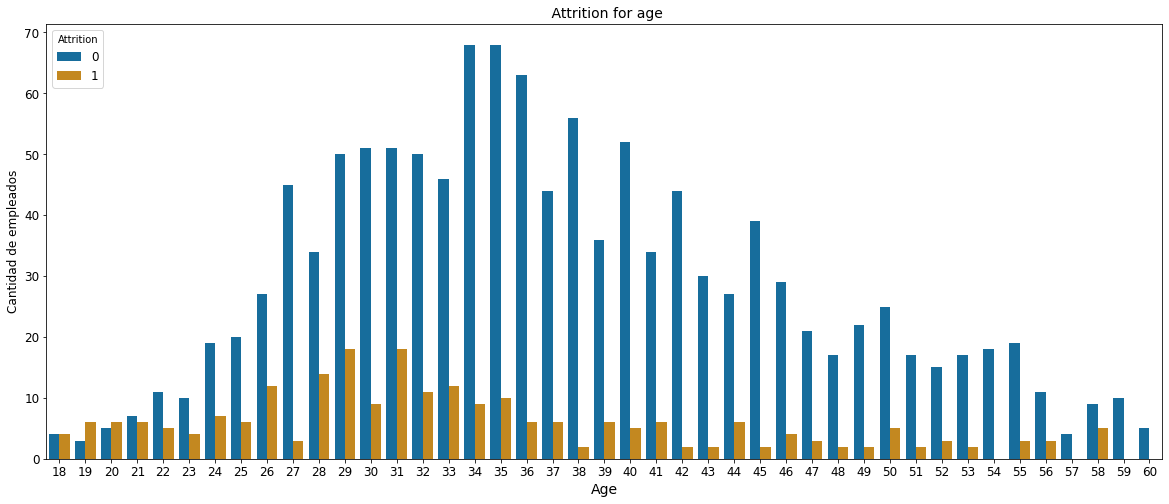

In [16]:
# Creamos el gráfico de barras
plt.figure(figsize=[20, 8])
sns.countplot(x='Age', hue='Attrition', data=data, palette='colorblind')
# Agregamos detalles visuales
plt.xlabel('Age', fontsize=14)
plt.ylabel('Cantidad de empleados', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Attrition', fontsize=12)
# Agregamos título
plt.title(' Attrition for age', fontsize=14)
# Mostramos el gráfico
plt.show()

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

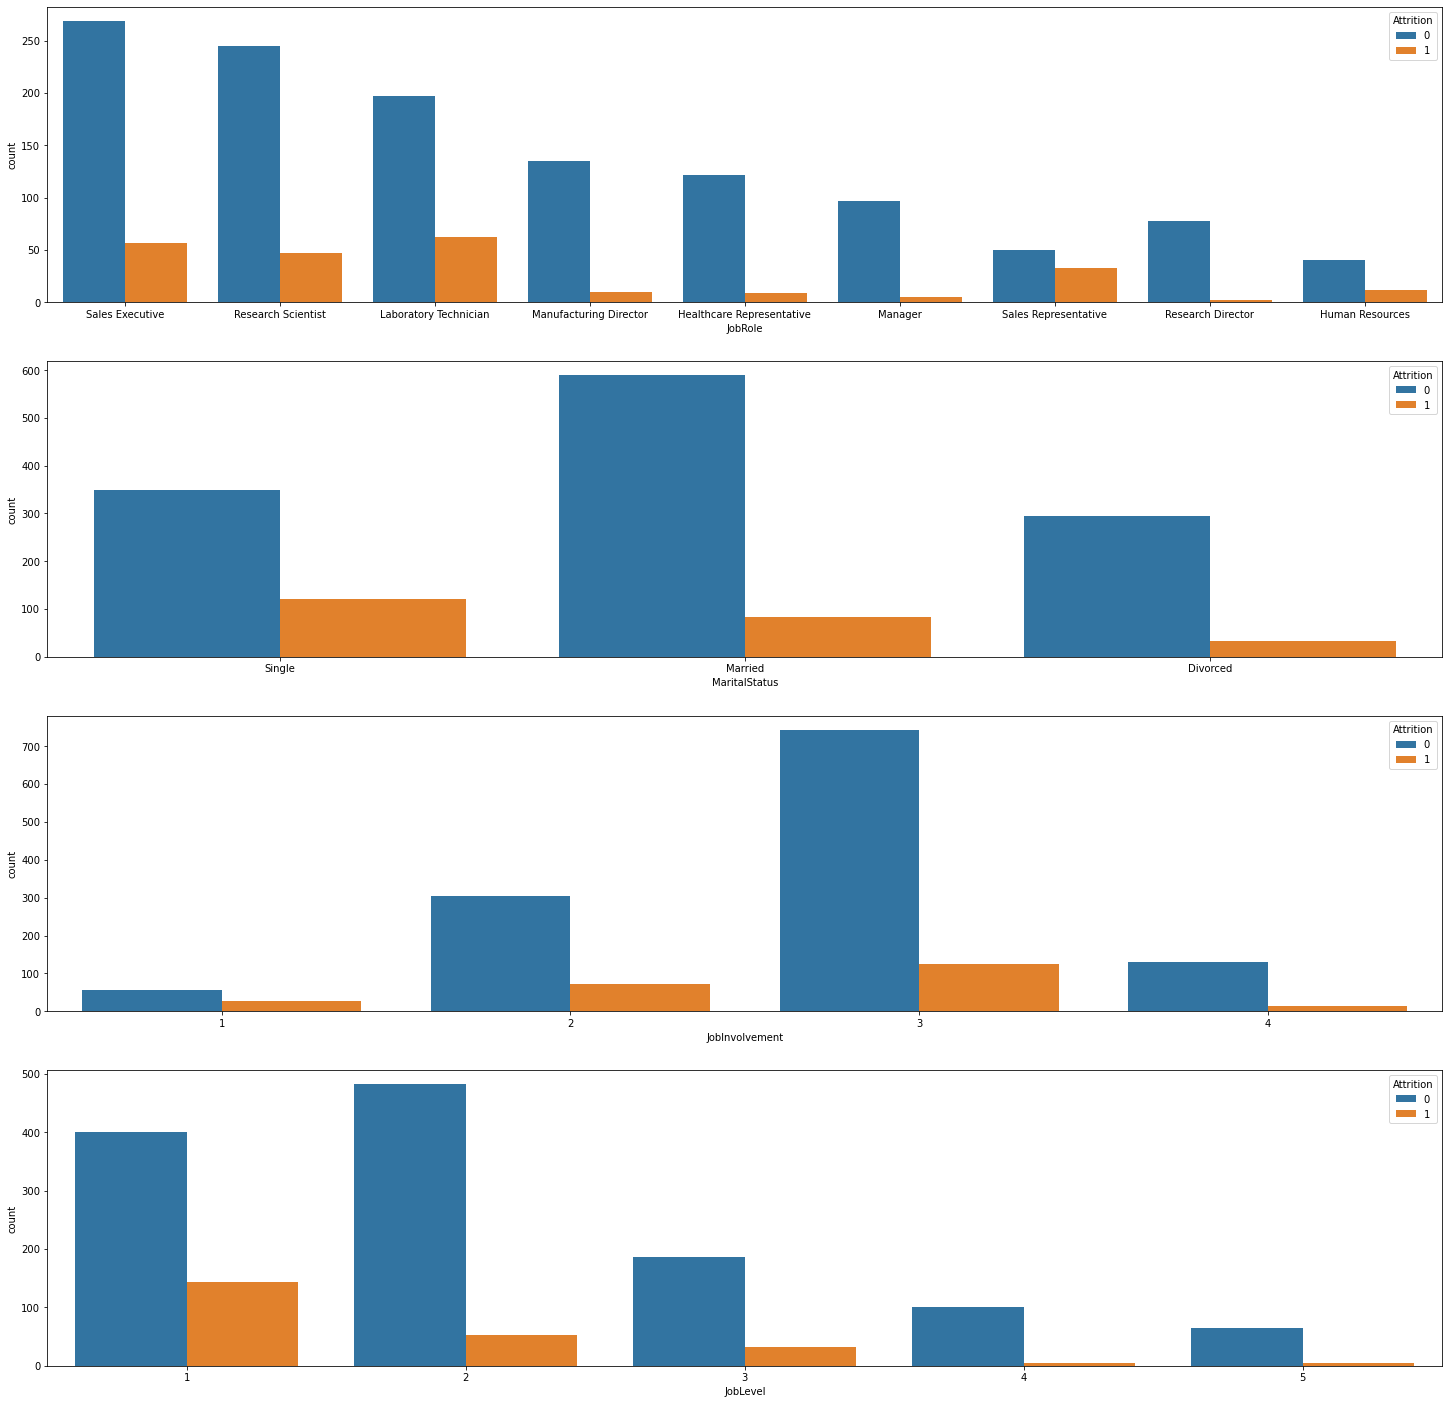

In [17]:
plt.figure(figsize=[25,25])
plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = data)
plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = data)
plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = data)
plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = data)



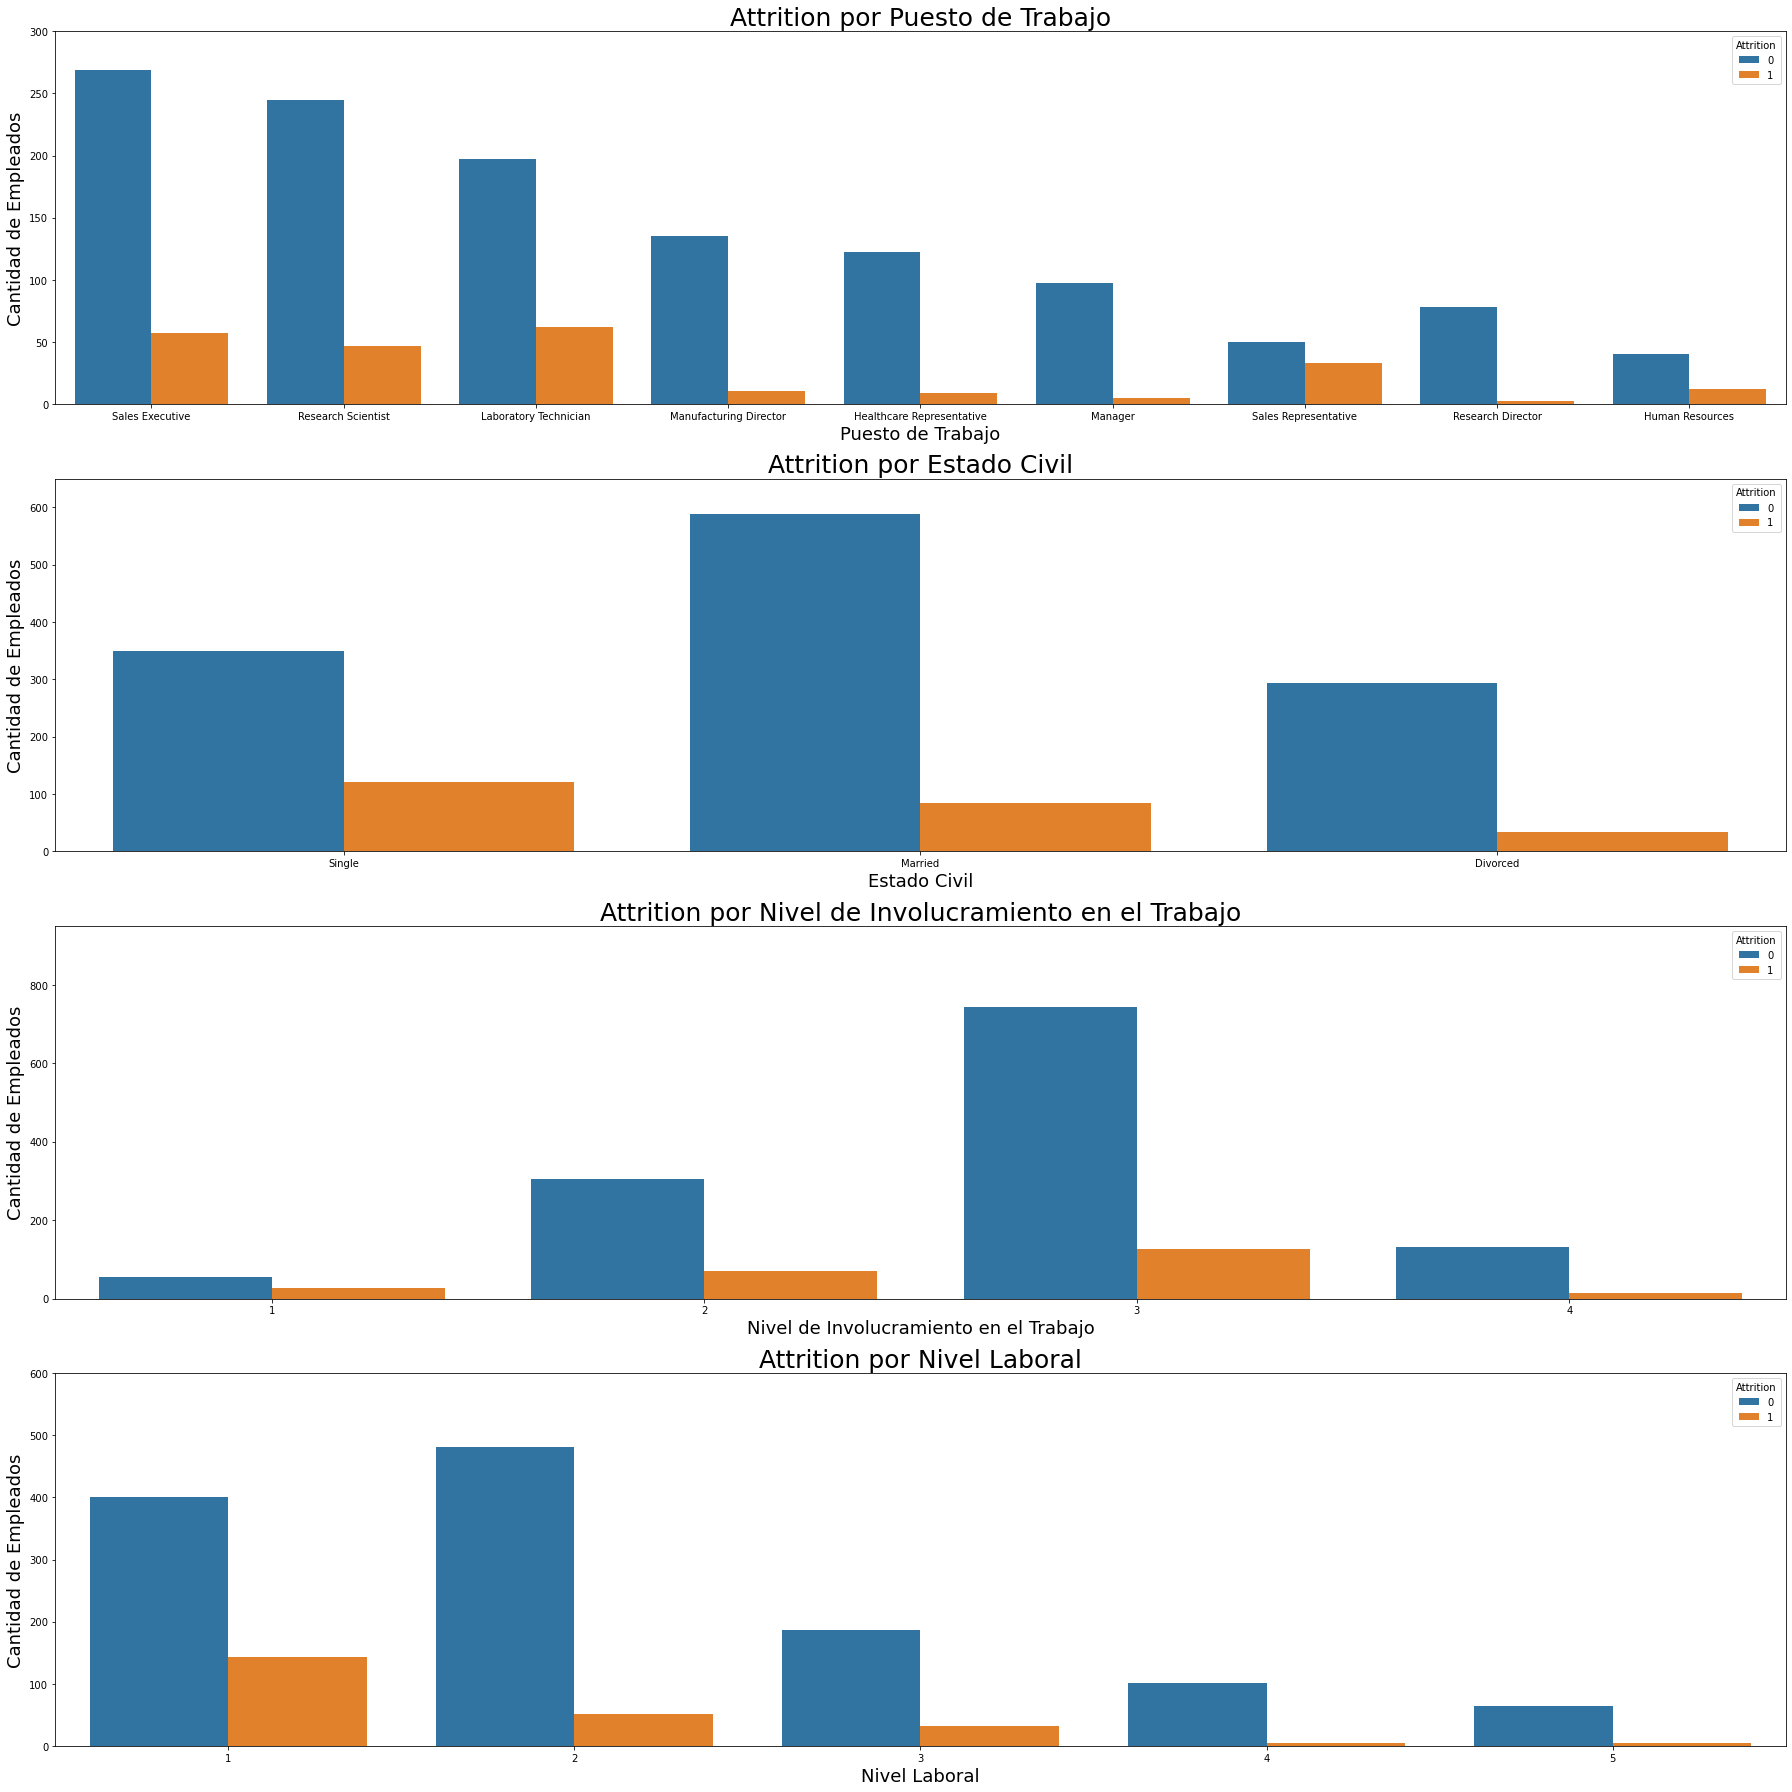

In [18]:
plt.figure(figsize=[25,25])

plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = data)
plt.xlabel('Puesto de Trabajo', fontsize=18)
plt.ylabel('Cantidad de Empleados', fontsize=18)
plt.title('Attrition por Puesto de Trabajo', fontsize=25)
plt.ylim(0, 300)

plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = data)
plt.xlabel('Estado Civil', fontsize=18)
plt.ylabel('Cantidad de Empleados', fontsize=18)
plt.title('Attrition por Estado Civil', fontsize=25)
plt.ylim(0, 650)

plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = data)
plt.xlabel('Nivel de Involucramiento en el Trabajo', fontsize=18)
plt.ylabel('Cantidad de Empleados', fontsize=18)
plt.title('Attrition por Nivel de Involucramiento en el Trabajo', fontsize=25)
plt.ylim(0, 950)

plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = data)
plt.xlabel('Nivel Laboral', fontsize=18)
plt.ylabel('Cantidad de Empleados', fontsize=18)
plt.title('Attrition por Nivel Laboral', fontsize=25)
plt.ylim(0, 600)

plt.tight_layout()


#### Los empleados solteros tienden a irse en comparación con los casados ​​y divorciados
#### Los representantes de ventas tienden a irse en comparación con cualquier otro departamento
#### Los empleados menos involucrados tienden a dejar la empresa
#### Los menos experimentados (nivel laboral bajo) tienden a dejar la empresa

Text(0.5, 0, 'Distancia desde Casa al Trabajo')

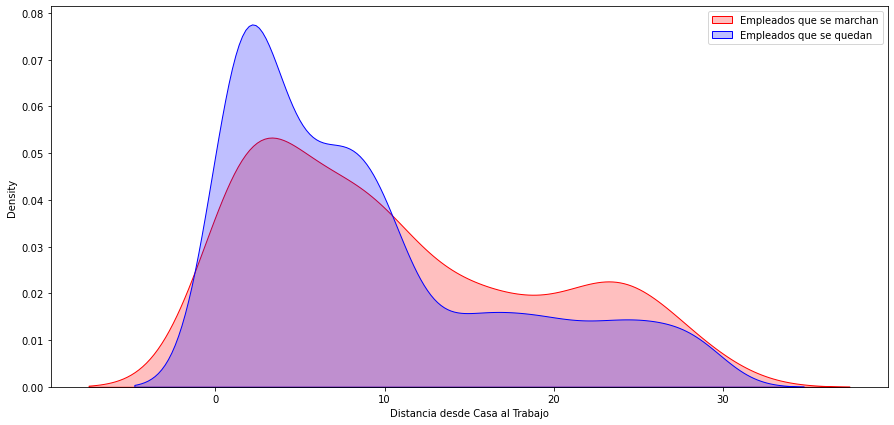

In [19]:
plt.figure(figsize=(15, 7))

sns.kdeplot(left['DistanceFromHome'], shade = True, color = 'r', label= 'Empleados que se marchan')
sns.kdeplot(stayed['DistanceFromHome'],  shade = True, color = 'b',label= 'Empleados que se quedan')
plt.legend()
plt.xlabel('Distancia desde Casa al Trabajo')

Text(0.5, 0, 'Años con su Manager Actual')

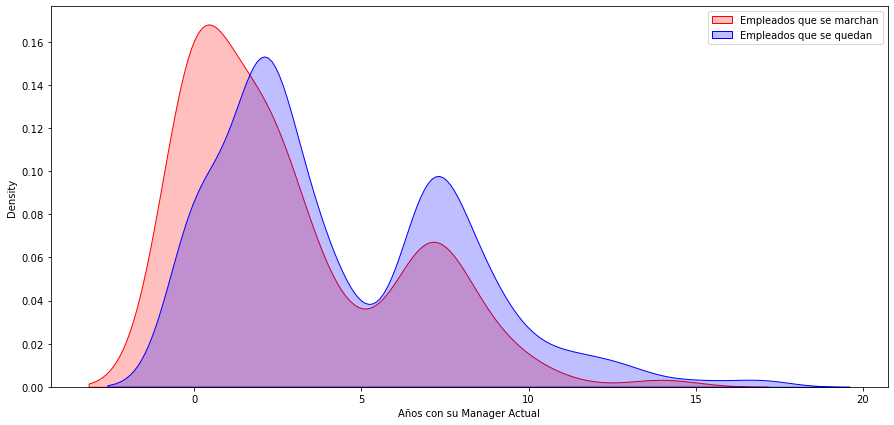

In [20]:
plt.figure(figsize=(15, 7))

sns.kdeplot(left['YearsWithCurrManager'], label = "Empleados que se marchan", shade = True, color = 'r')
sns.kdeplot(stayed['YearsWithCurrManager'], label = "Empleados que se quedan", shade = True, color = 'b')
plt.legend()

plt.xlabel('Años con su Manager Actual')

Text(0.5, 0, 'Número total de años de Trabajo')

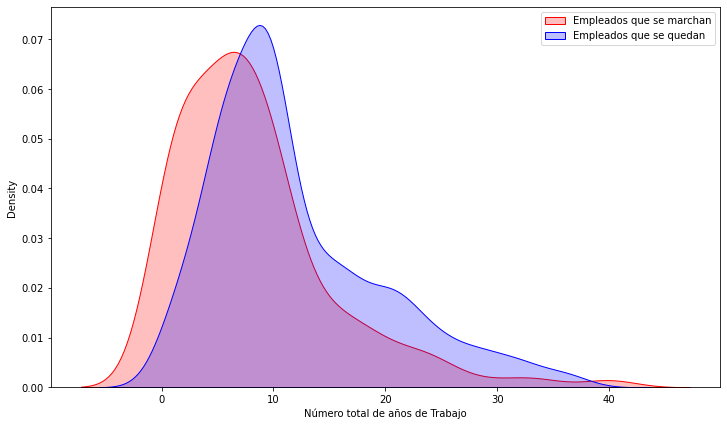

In [21]:
plt.figure(figsize=(12, 7))

sns.kdeplot(left['TotalWorkingYears'], label = "Empleados que se marchan", shade = True, color = 'r')
sns.kdeplot(stayed['TotalWorkingYears'], label = "Empleados que se quedan", shade = True, color = 'b')
plt.legend()

plt.xlabel('Número total de años de Trabajo')

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Gender'>

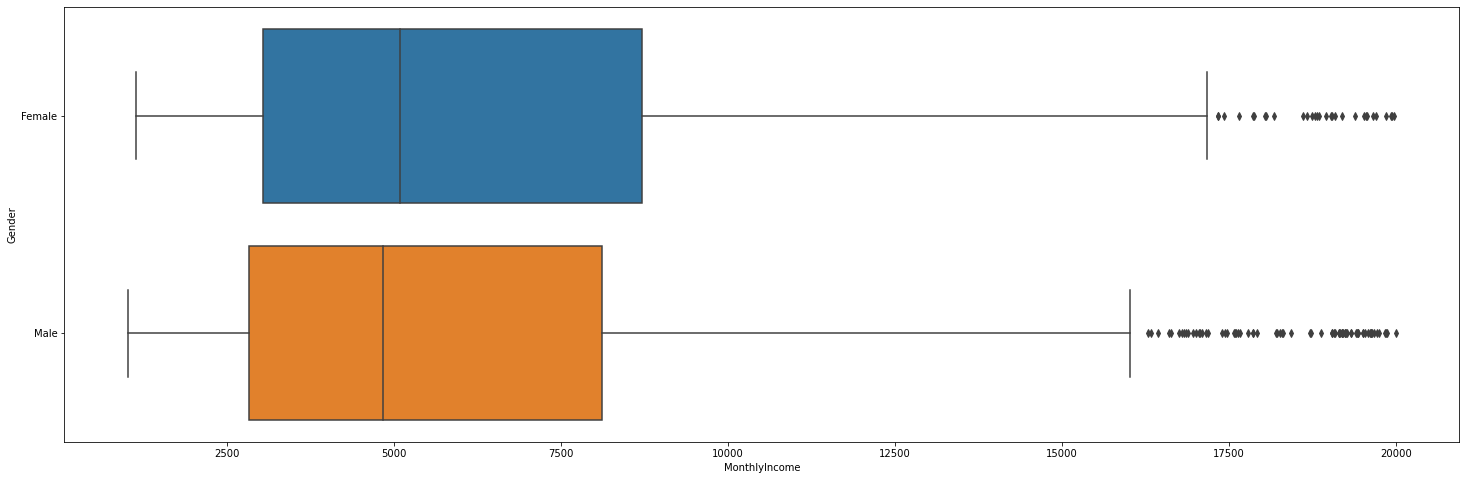

In [22]:
# Veamos el Gender vs. Monthly Income
plt.figure(figsize=(25, 8))

sns.boxplot(x = 'MonthlyIncome', y = 'Gender', data = data)

<AxesSubplot:xlabel='MonthlyIncome', ylabel='JobRole'>

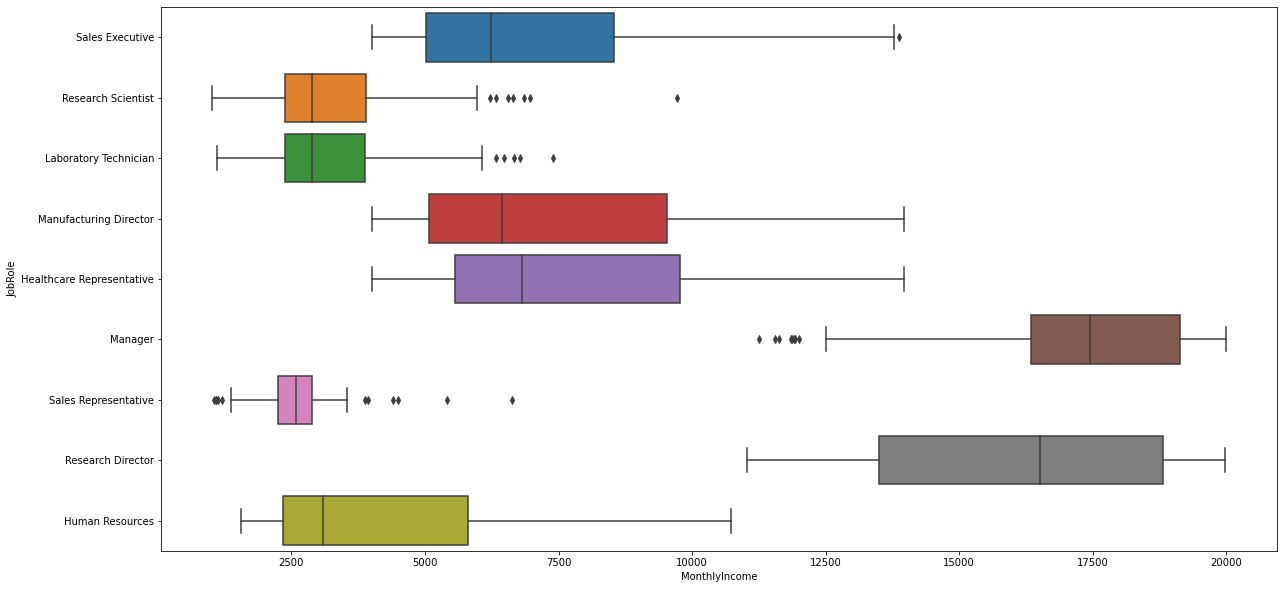

In [23]:
# Veamos el monthly income vs. job role
plt.figure(figsize=(20, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data = data)

### Modelo Predictivo en descubrir a potenciales empleadores en dejar el empleo
- Antes de empezar el machine learning y redes neuronales se realiza el tratamiento en los datos y asi obtener el data set training y testing


In [24]:
data.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0


In [25]:
X_cat = data[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']] 

In [26]:
X_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [27]:
from sklearn.preprocessing import OneHotEncoder


onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

- Normalizar variables categoricas, Ejemplo: Department  (['Sales', 'Research & Development', 'Human Resources']) las convertimos en 1 2 3 4 - Si empleado pertenece al dep. 2 su fila sera 1 en otro caso es 0.

In [28]:
 X_cat = pd.DataFrame(X_cat)
 X_cat

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [29]:
data.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [30]:
# Notemos que hemos elminado la columna target, 'Atrittion'
X_numerical = data[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 
                    'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',
                    'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',
                    'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'
                    , 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',
                    'YearsWithCurrManager']]
X_numerical

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


In [31]:
X_all = pd.concat([X_cat, X_numerical], axis = 1)
X_all

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,3,1,17,3,3,5,2,0,3
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,1,1,9,5,3,7,7,1,7
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,2,1,6,0,3,6,2,0,3
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,3,4,0,17,3,2,9,6,0,8


- Se sabe que X_all es una mezcla de tipos de datos en las columnas (int y str)  y sklearn.preprocessing no puede trabajar con columnas que no sean de tipo str.3

In [32]:
X_all.columns = X_all.columns.astype(str)
X_all = X_all.values

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)

In [34]:
X

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

In [35]:
y = data['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

## REGRESIÓN LOGÍSTICA,CLASIFICADORES DE BOSQUES ALEATORIOS Y REDES NEURONALES  
    

- ENTRENAR Y EVALUAR UN CLASIFICADOR UTILIZANDO LA REGRESIÓN LOGÍSTICA

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [37]:
X_train.shape

(1102, 50)

In [38]:
X_test.shape

(368, 50)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [40]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [41]:
from sklearn.metrics import confusion_matrix, classification_report

print("Accuracy {} %".format(100*accuracy_score(y_pred, y_test)))

Accuracy 89.40217391304348 %


Text(33.0, 0.5, 'data_pred')

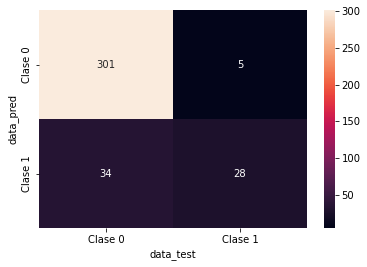

In [42]:
# Resultados en el Conjunto de Testing
class_names = ['Clase 0', 'Clase 1'] # Obtener los nombres de las etiquetas de las clases
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', 
            xticklabels=class_names, yticklabels=class_names) # Crear el heatmap con las etiquetas correspondientes en los ejes
plt.xlabel('data_test')
plt.ylabel('data_pred')

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       306
           1       0.85      0.45      0.59        62

    accuracy                           0.89       368
   macro avg       0.87      0.72      0.76       368
weighted avg       0.89      0.89      0.88       368



### ENTRENAR Y EVALUR UN CLASIFICADOR UTILIZANDO BOSQUES ALEATORIOS

In [55]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Text(33.0, 0.5, 'data_pred')

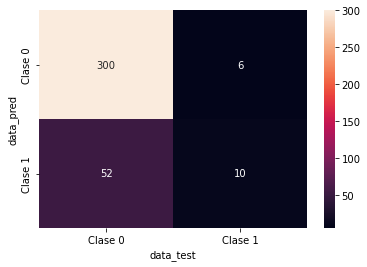

In [56]:
# Resultados en el Conjunto de Testing
class_names = ['Clase 0', 'Clase 1'] # Obtener los nombres de las etiquetas de las clases
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', 
            xticklabels=class_names, yticklabels=class_names) # Crear el heatmap con las etiquetas correspondientes en los ejes
plt.xlabel('data_test')
plt.ylabel('data_pred')

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       306
           1       0.62      0.16      0.26        62

    accuracy                           0.84       368
   macro avg       0.74      0.57      0.58       368
weighted avg       0.81      0.84      0.80       368



 ### ENTRENAR Y EVALUAR UN CLASIFICADOR UTILIZANDO DEEP LEARNING

In [58]:
import tensorflow as tf

In [67]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

model = Sequential([
    Dense(units=500, activation='relu', input_shape=(50,)), 
    Dropout(0.2),
    Dense(units=500, activation='relu'), 
    Dropout(0.2),
    Dense(units=500, activation='relu'),
    Dropout(0.2),
    Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Entrenar el modelo
epochs_hist = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
35/35 [==============================] - 1s 7ms/step - loss: 0.4452 - accuracy: 0.8394 - val_loss: 0.3882 - val_accuracy: 0.8315
Epoch 2/100
35/35 [==============================] - 0s 4ms/step - loss: 0.3572 - accuracy: 0.8457 - val_loss: 0.3470 - val_accuracy: 0.8533
Epoch 3/100
35/35 [==============================] - 0s 5ms/step - loss: 0.3249 - accuracy: 0.8711 - val_loss: 0.3276 - val_accuracy: 0.8723
Epoch 4/100
35/35 [==============================] - 0s 5ms/step - loss: 0.3070 - accuracy: 0.8666 - val_loss: 0.3431 - val_accuracy: 0.8641
Epoch 5/100
35/35 [==============================] - 0s 5ms/step - loss: 0.2822 - accuracy: 0.8938 - val_loss: 0.3188 - val_accuracy: 0.8967
Epoch 6/100
35/35 [==============================] - 0s 5ms/step - loss: 0.2454 - accuracy: 0.9020 - val_loss: 0.3420 - val_accuracy: 0.8641
Epoch 7/100
35/35 [==============================] - 0s 5ms/step - loss: 0.2246 - accuracy: 0.9056 - val_loss: 0.3748 - val_accuracy: 0.8696
Epoch 8/100
3

Epoch 59/100
35/35 [==============================] - 0s 4ms/step - loss: 0.0247 - accuracy: 0.9909 - val_loss: 1.5416 - val_accuracy: 0.8370
Epoch 60/100
35/35 [==============================] - 0s 5ms/step - loss: 0.0135 - accuracy: 0.9955 - val_loss: 1.4438 - val_accuracy: 0.8587
Epoch 61/100
35/35 [==============================] - 0s 5ms/step - loss: 0.0404 - accuracy: 0.9837 - val_loss: 1.3921 - val_accuracy: 0.8478
Epoch 62/100
35/35 [==============================] - 0s 4ms/step - loss: 0.0413 - accuracy: 0.9864 - val_loss: 1.1931 - val_accuracy: 0.8397
Epoch 63/100
35/35 [==============================] - 0s 6ms/step - loss: 0.0137 - accuracy: 0.9964 - val_loss: 1.2676 - val_accuracy: 0.8451
Epoch 64/100
35/35 [==============================] - 0s 8ms/step - loss: 0.0081 - accuracy: 0.9982 - val_loss: 1.3884 - val_accuracy: 0.8071
Epoch 65/100
35/35 [==============================] - 0s 7ms/step - loss: 0.0037 - accuracy: 0.9991 - val_loss: 1.4867 - val_accuracy: 0.8179
Epoch 

In [60]:
y_pred = model.predict(X_test)
y_pred

array([[1.73217393e-06],
       [2.26682212e-14],
       [2.05592811e-02],
       [3.48958338e-08],
       [4.85336459e-05],
       [3.93897295e-04],
       [2.38683473e-08],
       [1.52516591e-07],
       [1.81376350e-07],
       [1.88759998e-06],
       [5.91374311e-11],
       [2.13831663e-04],
       [2.00637760e-06],
       [8.35087721e-10],
       [4.76211309e-04],
       [2.50625890e-05],
       [2.37749927e-18],
       [2.28894455e-11],
       [4.96114808e-07],
       [2.31151390e-10],
       [1.70827325e-10],
       [3.90740070e-07],
       [2.95439592e-22],
       [2.50738117e-06],
       [4.34378892e-01],
       [6.43056512e-01],
       [4.12230984e-20],
       [2.86607485e-24],
       [1.16050414e-09],
       [1.06219905e-14],
       [1.90374934e-08],
       [4.53382469e-08],
       [4.13873558e-09],
       [9.48437496e-14],
       [9.98546541e-01],
       [2.57021147e-05],
       [1.80783272e-02],
       [6.61069155e-09],
       [3.54111195e-04],
       [9.97739196e-01],


In [68]:
y_pred = (y_pred > 0.5)


In [69]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

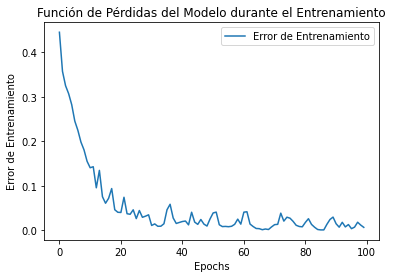

In [70]:
plt.plot(epochs_hist.history['loss'])
plt.title("Función de Pérdidas del Modelo durante el Entrenamiento")
plt.xlabel("Epochs")
plt.ylabel("Error de Entrenamiento")
plt.legend(["Error de Entrenamiento"])

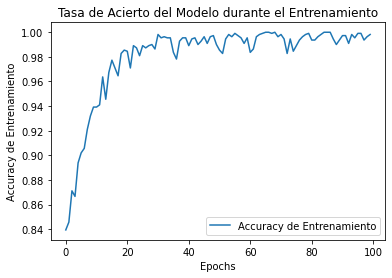

In [71]:
plt.plot(epochs_hist.history['accuracy'])
plt.title("Tasa de Acierto del Modelo durante el Entrenamiento")
plt.xlabel("Epochs")
plt.ylabel("Accuracy de Entrenamiento")
plt.legend(["Accuracy de Entrenamiento"])

Text(33.0, 0.5, 'data_pred')

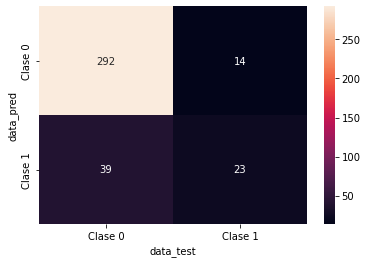

In [72]:
# Resultados en el Conjunto de Testing
class_names = ['Clase 0', 'Clase 1'] # Obtener los nombres de las etiquetas de las clases
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', 
            xticklabels=class_names, yticklabels=class_names) # Crear el heatmap con las etiquetas correspondientes en los ejes
plt.xlabel('data_test')
plt.ylabel('data_pred')

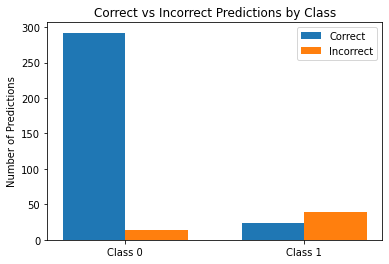

In [73]:
# Obtener resultados correctos e incorrectos por clase
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
correct = [tn, tp]
incorrect = [fp, fn]
# Crear gráfico de barras
x = np.arange(len(correct))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, correct, width, label='Correct')
rects2 = ax.bar(x + width/2, incorrect, width, label='Incorrect')
# Agregar etiquetas, títulos y leyendas
ax.set_xticks(x)
ax.set_xticklabels(['Class 0', 'Class 1'])
ax.legend()
ax.set_ylabel('Number of Predictions')
ax.set_title('Correct vs Incorrect Predictions by Class')
plt.show() # Mostrar gráfico


In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92       306
           1       0.62      0.37      0.46        62

    accuracy                           0.86       368
   macro avg       0.75      0.66      0.69       368
weighted avg       0.84      0.86      0.84       368



Estos son los resultados de una clasificación de dos clases utilizando métricas como la precisión, la recall y el f1-score, así como la matriz de confusión. Aquí hay una breve descripción de lo que significan estas métricas:
En este caso, el modelo ha sido evaluado en un conjunto de datos de prueba que consta de 368 observaciones. La tabla muestra las siguientes métricas:

- Precision: la proporción de verdaderos positivos entre los casos positivos predichos. En otras palabras, de todos los casos que el modelo ha etiquetado como positivos, ¿cuántos realmente son positivos? En este caso, la precision para la clase 0 (etiqueta negativa) es del 89% y para la clase 1 (etiqueta positiva) es del 55%.

- Recall: la proporción de verdaderos positivos entre todos los casos positivos reales. En otras palabras, de todos los casos que son realmente positivos, ¿cuántos ha identificado correctamente el modelo? En este caso, el recall para la clase 0 es del 93% y para la clase 1 es del 44%.

- F1-score: una medida que combina la precisión y el recall en una única métrica. Es útil cuando se busca un equilibrio entre ambas métricas. En este caso, el f1-score para la clase 0 es del 91% y para la clase 1 es del 49%.

- Support: el número de casos reales en cada clase.

- Accuracy: la proporción de casos correctamente clasificados en relación al total de casos. En este caso, la exactitud del modelo es del 85%.

- Macro avg: el promedio no ponderado de la precision, recall y f1-score para ambas clases.

- Weighted avg: el promedio ponderado de la precision, recall y f1-score para ambas clases, ponderados por el número de casos reales en cada clase.

En general, un modelo de clasificación ideal tendría valores altos en todas las métricas, pero en la práctica, a menudo se necesita un equilibrio entre la precisión y el recall en función del contexto y los requisitos de la aplicación.
Además, la "macro avg" y la "weighted avg" son promedios de las métricas para ambas clases. La "macro avg" calcula la media de las métricas para cada clase por separado y luego toma la media de esos valores, mientras que la "weighted avg" calcula la media de las métricas para cada clase por separado y luego toma una media ponderada por el número de muestras en cada clase.

##### El objetivo del estudio era lograr tener una predicción sobre que empleados dejarian el trabajo.



#  FINALIZADO